# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/CHURN_TELECON_MOD08_TAREFA_PT2.csv"

In [4]:
#Seu código de importação aqui
df = pd.read_csv(csv_file_path)

df.head(10)

,clienteID,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,0,YES,NO,1,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,NO
1,5575-GNVDE,0,NO,NO,34,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.95,1889.50,NO
2,3668-QPYBK,0,NO,NO,2,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,YES
3,7795-CFOCW,0,NO,NO,45,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,NO
4,8191-XWSZG,0,NO,NO,52,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,MAILED CHECK,71.45,1022.95,NO
5,9959-WOFKT,0,NO,YES,71,FIBER OPTIC,YES,NO,YES,TWO YEAR,BANK TRANSFER (AUTOMATIC),71.45,7382.25,NO
6,4190-MFLUW,0,YES,YES,10,DSL,NO,YES,NO,MONTH-TO-MONTH,CREDIT CARD (AUTOMATIC),71.45,528.35,YES
7,4183-MYFRB,0,NO,NO,21,FIBER OPTIC,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,71.45,1862.90,NO
8,8779-QRDMV,1,NO,NO,1,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,71.45,39.65,YES
9,1680-VDCWW,0,YES,NO,12,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,202.25,NO


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.
- **A variável Idoso apresenta apenas os dados 0 e 1, sendo considerada booleana, logo não deve ser considerada no describe.**
- **A médias e a medianas de Tempo_como_Cliente e Pagamento_Mensal estão bem equilibradas.**

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?
- **Não foi identificado nenhum outlier, pois todos os valores se encontram dentro dos inferior e superior. Ver gráficos abaixo.**

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.
- **Ver abaixo.**

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.
- **Variável booleana Idoso não está está baçanceada, pois 83,84% apresentam 0, não idoso, e 16,16% apresentam 1, idoso.**

In [5]:
#Seu código aqui
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


- **A variável Idoso apresenta apenas os dados 0 e 1, sendo considerada booleana, logo não deve ser considerada no describe.**
- **A médias e a medianas de Tempo_como_Cliente e Pagamento_Mensal estão bem equilibradas.**

In [6]:
# A variável Tempo_como_Cliente apresenta a linha "min" zerada
(df["Tempo_como_Cliente"] == 0).sum()

5

In [7]:
# Percentual de linhas
(df["Tempo_como_Cliente"] == 0).mean() * 100

0.20096463022508038

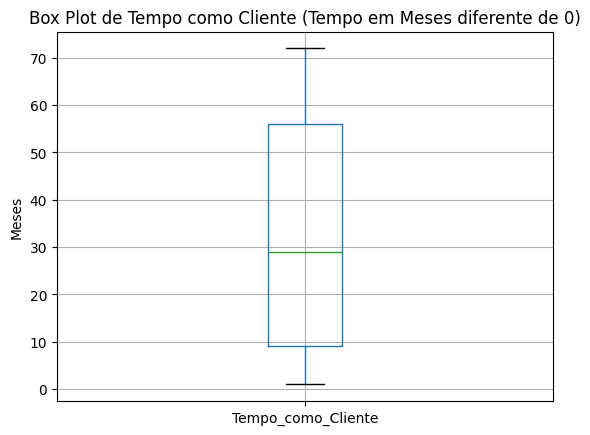

In [8]:
# Gráfico desconsiderando os dados zerados
df_nao_zero = df[df["Tempo_como_Cliente"] != 0]
df_nao_zero.boxplot(column="Tempo_como_Cliente")
plt.title("Box Plot de Tempo como Cliente (Tempo em Meses diferente de 0)")
plt.ylabel("Meses")
plt.show()

**O gráfico mostra a mediana ligeiramente menor que a média, conforme o describe, e também praticamente não mudou nada mesmo desconsiderando os dados diferentes de zero.**

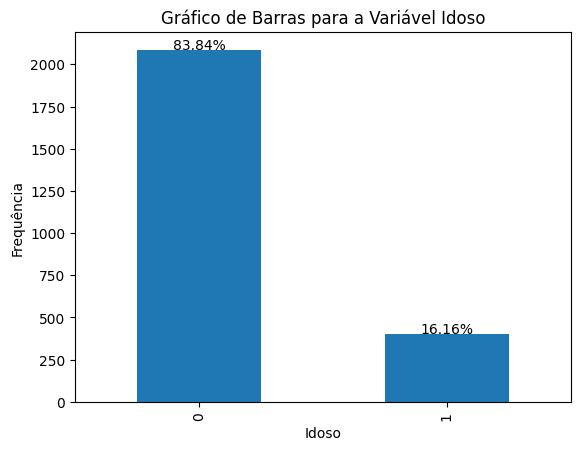

In [9]:
# D) Verifique se os dados das variáveis Booleanas são balanceados ou não.
# - Variável booleana Idoso não está está baçanceada, pois 83,84% apresentam 0, não idoso, e 16,16% apresentam 1, idoso.
contagem = df['Idoso'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso')
plt.ylabel('Frequência')

plt.show()

**Variável Idoso majoritariamente "não idoso", pois 83,84% constam como sendo 0, enquanto 16,16% constam como sendo "idoso".**

## Variáveis Categóricas

<ipython-input-10-542502afb83f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


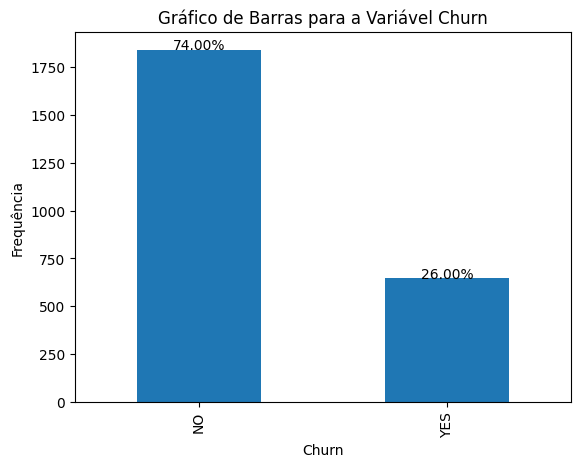

In [10]:
contagem = df['Churn'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')

plt.show()

**74% da base de dados não deu Churn, enquanto 26% deu Churn.**

<ipython-input-11-6de563910d68>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


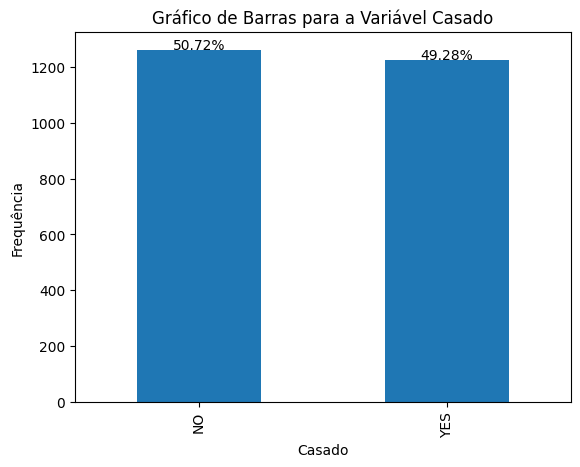

In [11]:
contagem = df['Casado'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Casado')
plt.xlabel('Casado')
plt.ylabel('Frequência')

plt.show()

**Dados de clientes casados e solteiros está balanceado.**

<ipython-input-12-2debf04a3838>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


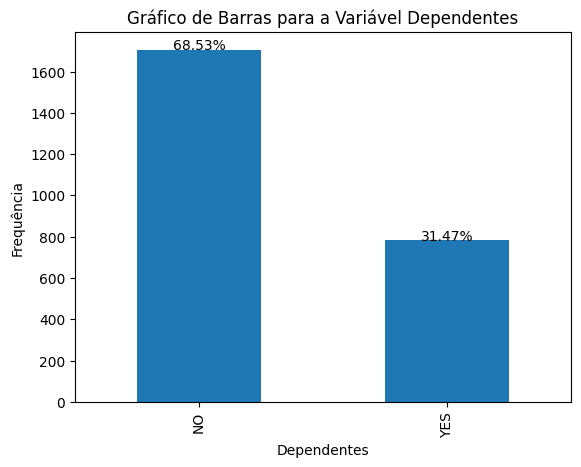

In [12]:
contagem = df['Dependentes'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Frequência')

plt.show()

**Base de dados majoritariamente sem dependentes com 68,53%, e 31,47% com dependentes.**

<ipython-input-13-302489e9478d>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


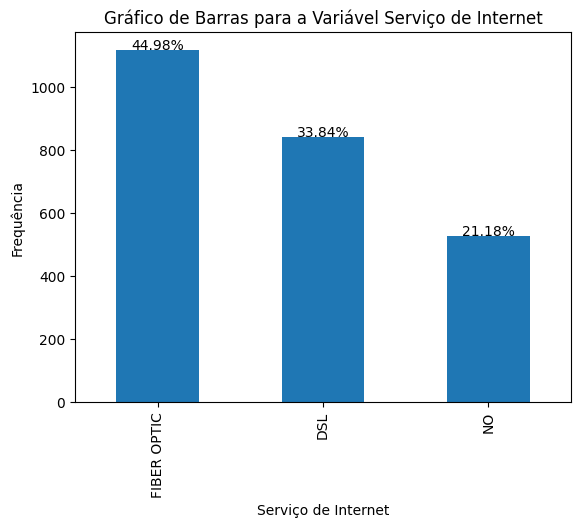

In [13]:
contagem = df['Servico_Internet'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Frequência')

plt.show()

**Serviços de internet aparentam ser balanceados, mas 21,18% do total de clientes não tem serviço de internet.**

<ipython-input-14-e23791ea4552>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


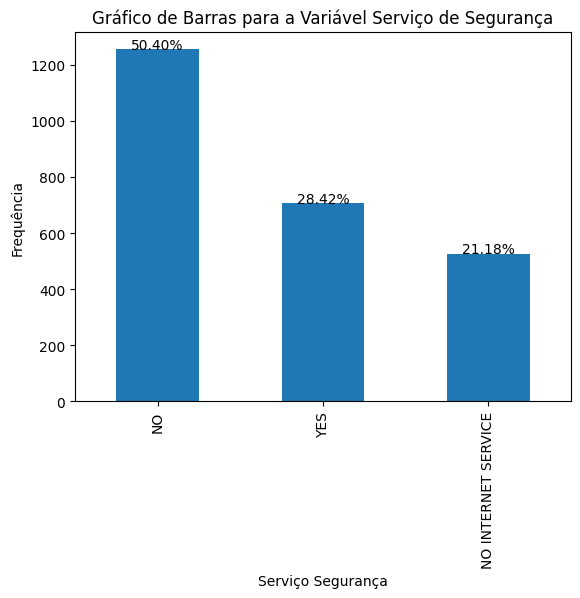

In [14]:
contagem = df['Servico_Seguranca'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Serviço de Segurança')
plt.xlabel('Serviço Segurança')
plt.ylabel('Frequência')

plt.show()

**50,40% dos usuários não tem serviço de segurança, enquanto 28,42% tem o serviço. O gráfico mostra ainda que 21,18% não utilizam o serviço de internet, corroborando com o Gráfico de Barras para a Variável Serviço de Internet.**

<ipython-input-15-58554f4ea2d2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


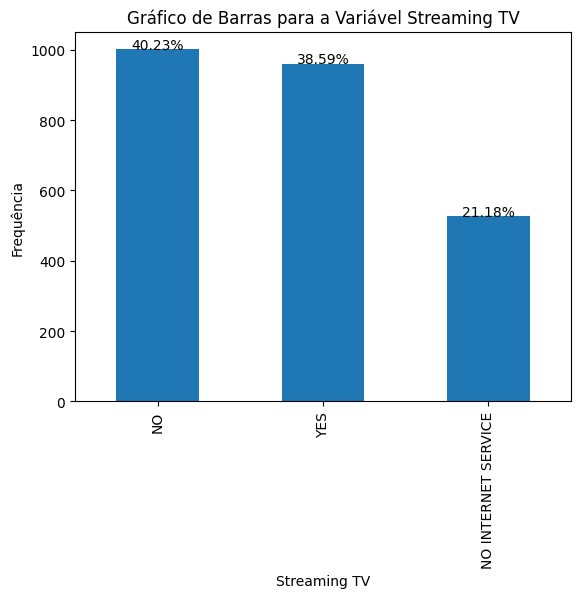

In [15]:
contagem = df['StreamingTV'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Frequência')

plt.show()

**Percentual de usuário e de não usuário do serviço de Streaming é balanceado.**

<ipython-input-16-c7fbc01c2527>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


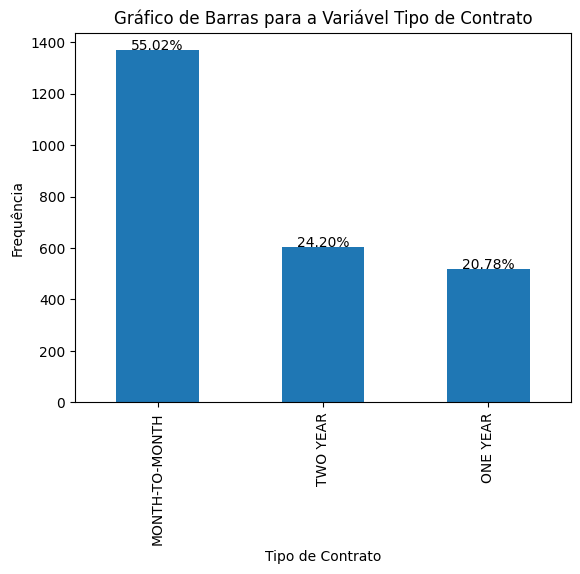

In [16]:
contagem = df['Tipo_Contrato'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frequência')

plt.show()

**55,02% dos clientes tem contrato do tipo mensal, e mais balanceadas estão as opções de dois anos, com 24,20%, e de um ano, com 20,78%.**

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


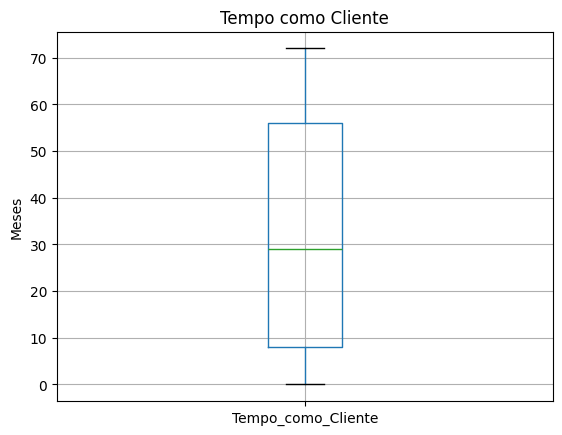

In [17]:
# Variável Tempo_como_Cliente
df.boxplot(column='Tempo_como_Cliente')
plt.title('Tempo como Cliente')
plt.ylabel('Meses')
plt.show()

In [47]:
# Método IQR
Q1 = df['Tempo_como_Cliente'].quantile(0.25)
Q3 = df['Tempo_como_Cliente'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr = df[(df['Tempo_como_Cliente'] <= (Q1 - 1.5 * IQR)) & (df['Tempo_como_Cliente'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr)

Empty DataFrame
Columns: [clienteID, Idoso, Casado, Dependentes, Tempo_como_Cliente, Servico_Internet, Servico_Seguranca, Suporte_Tecnico, StreamingTV, Tipo_Contrato, Forma_Pagamento, Pagamento_Mensal, Total_Pago, Churn]
Index: []


**Outliers não foram identificados, mesmo utilizando os fatores 1.0 e 3.0**

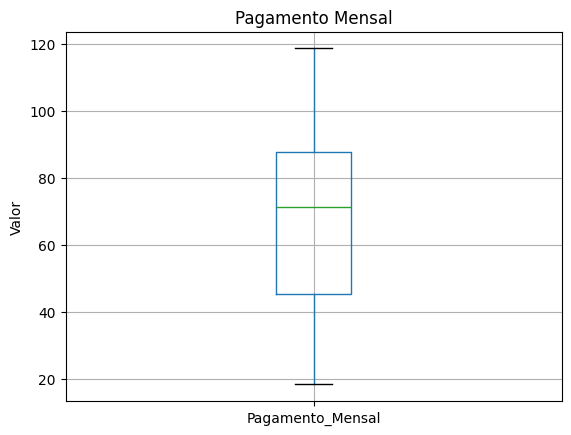

In [19]:
# Variável Pagamento_Mensal
df.boxplot(column='Pagamento_Mensal')
plt.title('Pagamento Mensal')
plt.ylabel('Valor')
plt.show()

In [48]:
# Método IQR
Q1 = df['Pagamento_Mensal'].quantile(0.25)
Q3 = df['Pagamento_Mensal'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr = df[(df['Pagamento_Mensal'] <= (Q1 - 1.5 * IQR)) & (df['Pagamento_Mensal'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr)

Empty DataFrame
Columns: [clienteID, Idoso, Casado, Dependentes, Tempo_como_Cliente, Servico_Internet, Servico_Seguranca, Suporte_Tecnico, StreamingTV, Tipo_Contrato, Forma_Pagamento, Pagamento_Mensal, Total_Pago, Churn]
Index: []


**Outliers não foram identificados, mesmo utilizando os fatores 1.0 e 3.0**

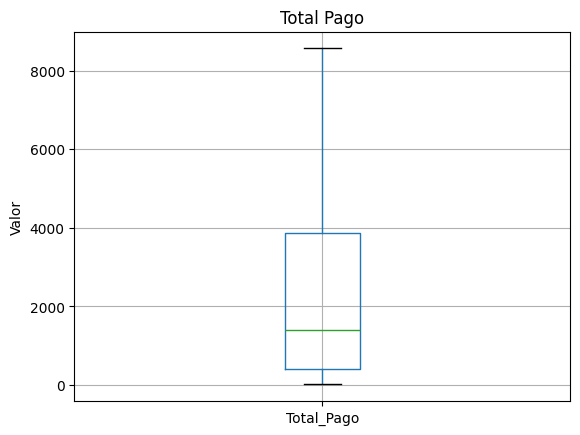

In [21]:
# Variável Total_Pago
df.boxplot(column='Total_Pago')
plt.title('Total Pago')
plt.ylabel('Valor')
plt.show()

In [49]:
# Método IQR
Q1 = df['Total_Pago'].quantile(0.25)
Q3 = df['Total_Pago'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr = df[(df['Total_Pago'] <= (Q1 - 1.5 * IQR)) & (df['Total_Pago'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr)

Empty DataFrame
Columns: [clienteID, Idoso, Casado, Dependentes, Tempo_como_Cliente, Servico_Internet, Servico_Seguranca, Suporte_Tecnico, StreamingTV, Tipo_Contrato, Forma_Pagamento, Pagamento_Mensal, Total_Pago, Churn]
Index: []


**Outliers não foram identificados, mesmo utilizando os fatores 1.0 e 3.0**

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.
- **Qual Tipo de Contrato apresenta maior percentual de Churn?**
- **Clientes Casados estão mais propensos a Churn que os solteiros?**
- **Clientes que deram Churn fizeram algum tipo de contato com o Suporte Técnico?**
- **Clientes com quanto tempo de contrato tem mais chance de dar Churn?**
- **Qual Forma de Pagamento está mais propensa a dar Churn?**

B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?
- **Tipo_Contrato**
- **Suporte_Tecnico**
- **Tempo_como_cliente**
- **Forma_Pagamento**

In [27]:
#Seu código aqui
df.head(10)

,clienteID,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,0,YES,NO,1,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,NO
1,5575-GNVDE,0,NO,NO,34,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.95,1889.50,NO
2,3668-QPYBK,0,NO,NO,2,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,YES
3,7795-CFOCW,0,NO,NO,45,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,NO
4,8191-XWSZG,0,NO,NO,52,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,MAILED CHECK,71.45,1022.95,NO
5,9959-WOFKT,0,NO,YES,71,FIBER OPTIC,YES,NO,YES,TWO YEAR,BANK TRANSFER (AUTOMATIC),71.45,7382.25,NO
6,4190-MFLUW,0,YES,YES,10,DSL,NO,YES,NO,MONTH-TO-MONTH,CREDIT CARD (AUTOMATIC),71.45,528.35,YES
7,4183-MYFRB,0,NO,NO,21,FIBER OPTIC,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,71.45,1862.90,NO
8,8779-QRDMV,1,NO,NO,1,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,71.45,39.65,YES
9,1680-VDCWW,0,YES,NO,12,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,202.25,NO


**Variável Tipo_Contrato x Churn:**
 - **Neste gráfico podemos verificar que 89,64% dos clientes que deram Churn estão no tipo de contrato "mês-a-mês".**

In [31]:
df_grouped = df.groupby(['Churn', 'Tipo_Contrato']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tipo_Contrato', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tipo_Contrato': 'Tipo de Contrato'})

fig.update_layout(title='Relação entre Churn e Tipo de Contrato',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo de Contrato')
fig.show()

**Variável Casado x Churn:**
- **O gráfico abaixo mostra que clientes solteiros estão mais propensos a dar churn do que os clientes casados. Embora o percentual de solteiros que deram churn seja maior que de casado, não seria prudente afirmar que essa tendência é majoritária.**

In [33]:
df_grouped = df.groupby(['Churn', 'Casado']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Casado', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Casado': 'Casado'})

fig.update_layout(title='Relação entre Churn e Casado',
                  yaxis_title='Porcentagem',
                  legend_title='Casado')
fig.show()

**Variável Churn x Suporte_Tecnico:**
- **Os gráficos abaixo mostram que 81,14% dos clientes que deram Churn não tiveram contato com o Suporte Técnico.**

In [35]:
df_grouped = df.groupby(['Churn', 'Suporte_Tecnico']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Suporte_Tecnico', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Suporte_Tecnico': 'Suporte Técnico'})

fig.update_layout(title='Relação entre Churn e Suporte Técnico',
                  yaxis_title='Porcentagem',
                  legend_title='Suporte Técnico')
fig.show()

- **Clientes SEM suporte técnico tendem a manter o contrato por menos tempo (dão Churn).**

In [50]:
df_grouped = df.groupby(['Suporte_Tecnico', 'Tempo_como_Cliente']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Suporte_Tecnico')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Suporte_Tecnico', y='percent', color='Tempo_como_Cliente', barmode='stack',
             labels={'Suporte_Tecnico': 'Suporte Técnico', 'percent': 'Porcentagem', 'Tempo_como_Cliente': 'Tempo como Cliente'})

fig.update_layout(title='Relação entre Suporte Técnico e Tempo como Cliente',
                  yaxis_title='Porcentagem',
                  legend_title='Tempo como Cliente')
fig.show()

- **Clientes COM suporte técnico tendem a manter o contrato por mais tempo (não dão Churn).**

In [53]:
mediana = df.groupby('Suporte_Tecnico')['Tempo_como_Cliente'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='Suporte_Tecnico', y='Tempo_como_Cliente',
             title='Média Tempo como Cliente Suporte Técnico')
fig.show()

**Variável Tempo_como_Cliente x Churn:**
- **Os gráficos abaixo mostram que clientes com menos de um ano de contrato, mais precisamente com 10 meses, têm mais chances de dar Churn.**

In [36]:
df_grouped = df.groupby(['Churn', 'Tempo_como_Cliente']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tempo_como_Cliente', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tempo_como_Cliente': 'Tempo como Cliente'})

fig.update_layout(title='Relação entre Churn e Tempo como Cliente',
                  yaxis_title='Porcentagem',
                  legend_title='Tempo como Cliente')
fig.show()

In [46]:
mediana = df.groupby('Churn')['Tempo_como_Cliente'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='Churn', y='Tempo_como_Cliente',
             title='Média Tempo como Cliente Churn')
fig.show()

**Variável Forma_Pagamento x Churn:**
- **O gráfico abaixo mostra que 58,42% dos clientes que deram Churn utilizavam a forma de pagamento "cheque eletrônico".**

In [41]:
df_grouped = df.groupby(['Churn', 'Forma_Pagamento']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Forma_Pagamento', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Forma_Pagamento': 'Forma de Pagamento'})

fig.update_layout(title='Relação entre Churn e Forma de Pagamento',
                  yaxis_title='Porcentagem',
                  legend_title='Forma de Pagamento')